In [7]:
# package 
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# import data
data_name_june = "yellow_tripdata_2025-06.parquet"
raw_data_url_june = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-06.parquet"

# Download file terlebih dahulu
response = requests.get(raw_data_url_june)
with open(f"../data/{data_name_june}", "wb") as f:
    f.write(response.content)

# Baca file parquet dari lokal
df_june = pd.read_parquet(f"../data/{data_name_june}")

trip_data_06 = df_june



In [9]:
# cek mising values dan duplikasi
print("Mising Values:\n", trip_data_06.isna().sum())
print("\nDuplicate Rows:", trip_data_06.duplicated().sum())

Mising Values:
 VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1212946
trip_distance                  0
RatecodeID               1212946
store_and_fwd_flag       1212946
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1212946
Airport_fee              1212946
cbd_congestion_fee             0
dtype: int64

Duplicate Rows: 0


In [11]:
# hapus missing values 
trip_data_06 = trip_data_06.dropna()

In [12]:
# 5 data teratas
trip_data_06.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


#### `tip_amount`

In [13]:
# 5 data teratas
trip_data_06['tip_amount'].head()

0    20.15
1     6.09
2     2.59
3     5.00
4     5.25
Name: tip_amount, dtype: float64

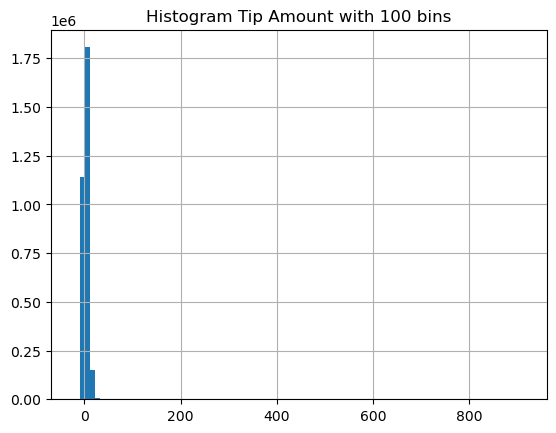

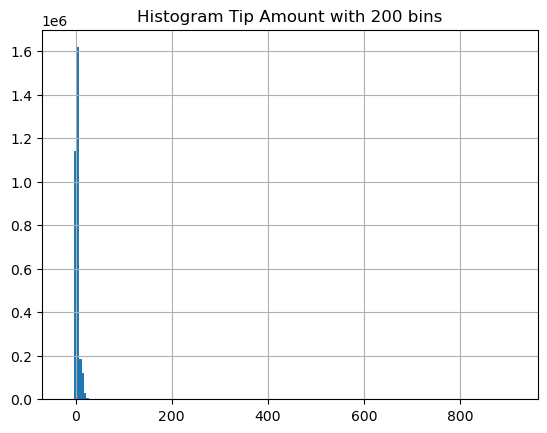

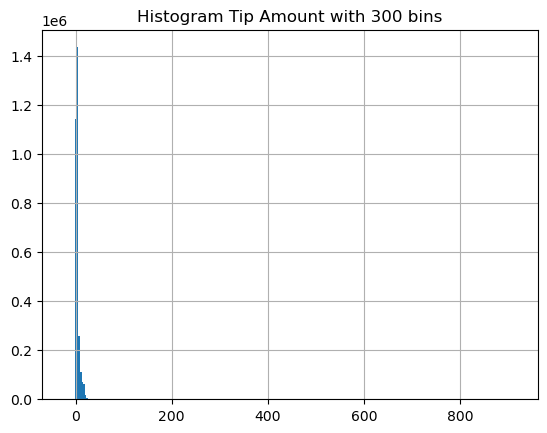

In [15]:
# histogram `tip_amount`
for i in range(1,4):
    trip_data_06['tip_amount'].hist(bins=i*100)
    plt.title(f'Histogram Tip Amount with {i*100} bins')
    plt.xlim(np.min(trip_data_06['tip_amount']), np.max(trip_data_06['tip_amount']))
    plt.show()

##### karena persebarannya tidak normal (pasti ada pencilan data), jadi saya mau tau atau cek data yang 'tip_amount' > 50

In [16]:
# cek jumlah data tip_amount > 50
len(trip_data_06[trip_data_06['tip_amount'] > 50])

876

In [17]:
# cek persentase data tip_amount > 50 dengan jumlah seluruh data
upper50 = trip_data_06[trip_data_06['tip_amount'] > 50]
print(f'{len(upper50)/len(trip_data_06)*100} %')

0.028167075775221595 %


##### Dan angkanya 0.02%, wajar sihh karena emang >$50 untuk tip lumayan banyak yaa. Yang aku heran adalah kenapa pada data tip_amount ini nilai maksimalnya 800, orang kaya gabut kali yaa ahaha

Text(0, 0.5, 'Tip Amount ($)')

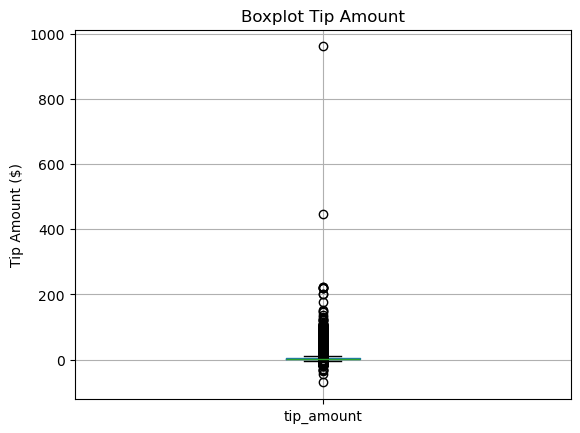

In [18]:
# boxplot untuk cek pencilan data dengan teori, ga hanya filing
trip_data_06.boxplot(column=['tip_amount'])

# legend boxplot
plt.title('Boxplot Tip Amount')
plt.ylabel('Tip Amount ($)')

#### baru sadar ternyata ada yang < 0 ?? ini valid ga sih? coba kita cek tip_amount < 0

In [19]:
# tip_amount < 0
trip_data_06[trip_data_06['tip_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
4554,2,2025-06-01 00:53:17,2025-06-01 00:53:38,1.0,0.00,5.0,N,236,236,4,-19.1,-1.0,-0.5,-2.40,0.00,-1.0,-27.25,-2.5,0.00,-0.75
30399,2,2025-06-01 11:47:09,2025-06-01 11:47:11,1.0,0.00,1.0,N,264,264,3,-3.0,0.0,-0.5,-0.90,0.00,-1.0,-5.40,0.0,0.00,0.00
34170,2,2025-06-01 12:43:09,2025-06-01 12:43:29,1.0,0.00,1.0,N,193,193,3,-3.0,0.0,-0.5,-0.90,0.00,-1.0,-5.40,0.0,0.00,0.00
35243,2,2025-06-01 12:17:30,2025-06-01 12:49:31,1.0,10.85,1.0,N,138,161,3,-48.5,-5.0,-0.5,-16.30,-6.94,-1.0,-83.24,-2.5,-1.75,-0.75
37476,2,2025-06-01 13:36:20,2025-06-01 13:36:32,1.0,0.00,1.0,N,193,193,3,-3.0,0.0,-0.5,-0.90,0.00,-1.0,-5.40,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953017,2,2025-06-29 05:07:32,2025-06-29 05:26:18,1.0,11.31,1.0,N,164,138,4,-44.3,-6.0,-0.5,-12.90,-6.94,-1.0,-77.39,-2.5,0.00,-0.75
3041471,2,2025-06-30 10:25:03,2025-06-30 10:25:08,1.0,0.00,1.0,N,193,193,3,-3.0,0.0,-0.5,-0.10,0.00,-1.0,-4.60,0.0,0.00,0.00
3072525,2,2025-06-30 16:25:09,2025-06-30 16:25:13,1.0,0.00,1.0,N,193,193,3,-3.0,-2.5,-0.5,-1.40,0.00,-1.0,-8.40,0.0,0.00,0.00
3075481,2,2025-06-30 16:06:54,2025-06-30 16:20:56,2.0,1.02,1.0,N,246,230,4,-12.8,-2.5,-0.5,-4.01,0.00,-1.0,-24.06,-2.5,0.00,-0.75


##### ternyata lumayan banyak, 367 rows!!!. Aku gatau apa alasan pastinya, sepertinya kesalahan input, aku mau drop aja

In [20]:
# data tip_amount yang valid (>= 0)
positive_amount_data = trip_data_06[trip_data_06['tip_amount'] >= 0]

In [21]:
# melihat Q1, Q3, IQR dan outlier
Q1 = positive_amount_data['tip_amount'].quantile(0.25)
Q3 = positive_amount_data['tip_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = positive_amount_data[ (positive_amount_data['tip_amount'] < lower_bound) |  (positive_amount_data['tip_amount'] > upper_bound)]
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Q1: 1.0, Q3: 4.57, IQR: 3.5700000000000003
Lower Bound: -4.355, Upper Bound: 9.925


##### ternyata malah lebih ekstrim, upper bound nya adalah 9.675. Kita sekarang coba visualisasi kembali dengan menghiraukan data tip_amount yang <= 10 (angkat 10 didapat dari pembulatan 9.625)

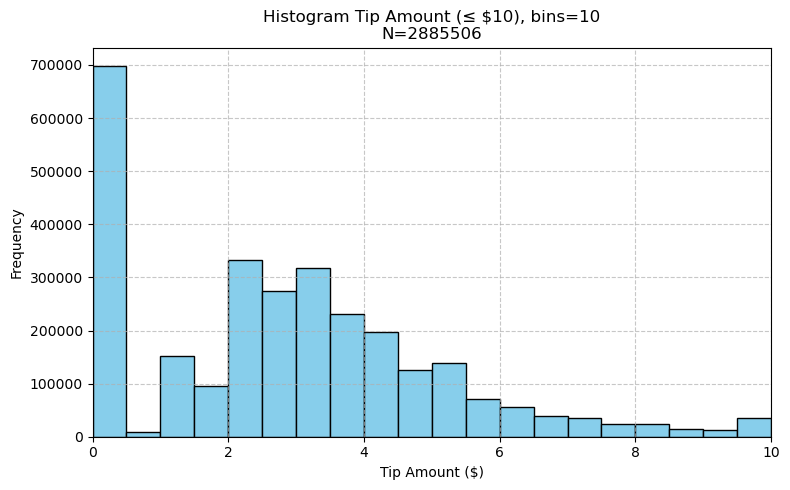

In [22]:
# histogram `tip_amount` tanpa outlier (tip_amount <= 10)
trip_data_06_no_outliers = positive_amount_data[positive_amount_data['tip_amount'] <= 10]

plt.figure(figsize=(8, 5))
trip_data_06_no_outliers['tip_amount'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram Tip Amount (≤ $10), bins={10}\nN={len(trip_data_06_no_outliers)}')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.xlim(np.min(trip_data_06_no_outliers['tip_amount']), np.max(trip_data_06_no_outliers['tip_amount']))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### `cek korelasi antara tip_amount dengan variable lain yang berpotensi memiliki korelasi`

In [23]:
# Cek korelasi tip_amount dengan kolom numerik lainnya
correlations = positive_amount_data.corr(numeric_only=True)['tip_amount'].sort_values(ascending=False)
print(correlations)

tip_amount               1.000000
tolls_amount             0.451942
Airport_fee              0.420200
trip_distance            0.310085
extra                    0.212416
improvement_surcharge    0.164585
total_amount             0.098288
cbd_congestion_fee       0.082521
fare_amount              0.065805
mta_tax                  0.047059
passenger_count          0.023371
congestion_surcharge     0.022238
VendorID                 0.012249
DOLocationID            -0.035024
PULocationID            -0.070765
RatecodeID              -0.094098
payment_type            -0.328393
Name: tip_amount, dtype: float64


##### Ternyata yang memiliki korelasi signifikan ada 3 (corr>0.3) yaitu tolls_amount, Airport_fee, trip distance.
##### dan itu menurut aku masuk akal. misal tools_amount semakin besar, semakin besar pula tip yang diberikan. Kita bisa asumsikan perjalanannya jauh karena bayar tol lebih mahal.

In [24]:
# cek unique value semua kolom

# list kolom kategori
cat_col = []

for col in positive_amount_data.columns:
    unique_values = positive_amount_data[col].nunique()
    values = positive_amount_data[col].unique()
    if unique_values < 10:
        unique_values = positive_amount_data[col].nunique()
        cat_col.append(col)
    else:
        continue
    print(f'Column: {col}, Unique Values: {unique_values}, Values: {values}')


Column: VendorID, Unique Values: 3, Values: [1 2 7]
Column: RatecodeID, Unique Values: 7, Values: [ 1.  2. 99.  5.  4.  3.  6.]
Column: store_and_fwd_flag, Unique Values: 2, Values: ['N' 'Y']
Column: payment_type, Unique Values: 5, Values: [1 2 3 4 5]
Column: mta_tax, Unique Values: 8, Values: [ 0.5  -0.5   0.    5.    4.75  3.5   3.25  4.  ]
Column: improvement_surcharge, Unique Values: 3, Values: [ 1. -1.  0.]
Column: congestion_surcharge, Unique Values: 3, Values: [ 2.5  0.  -2.5]
Column: Airport_fee, Unique Values: 5, Values: [ 1.75  0.   -1.75  6.75  5.  ]
Column: cbd_congestion_fee, Unique Values: 3, Values: [ 0.75  0.   -0.75]


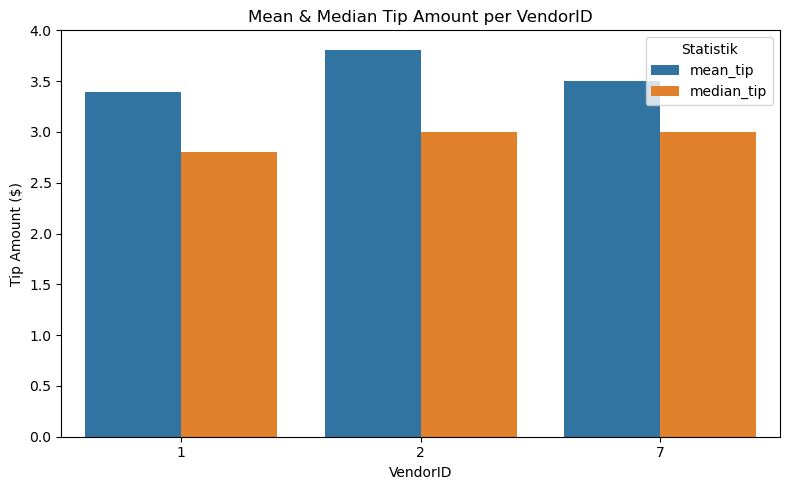

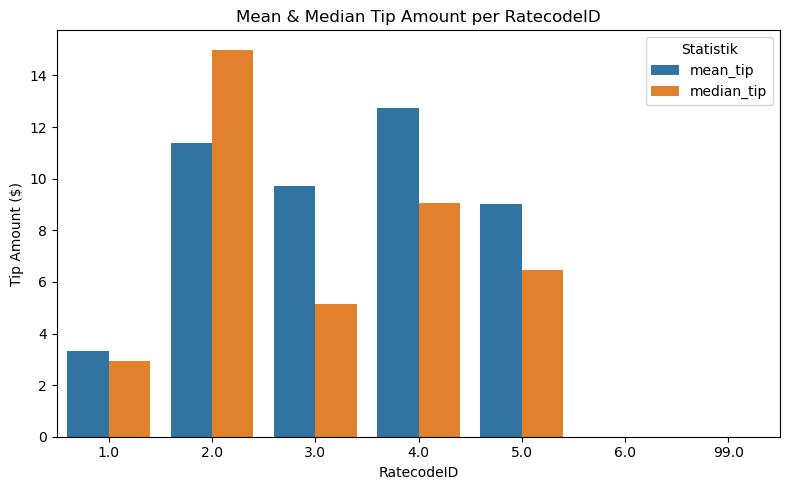

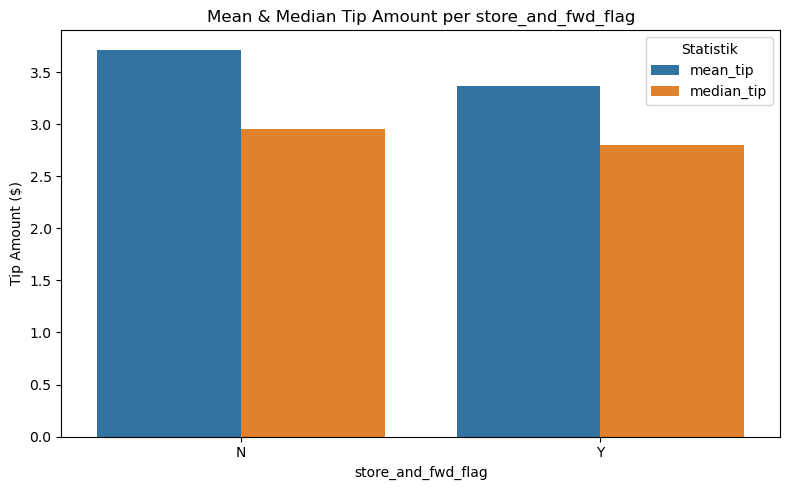

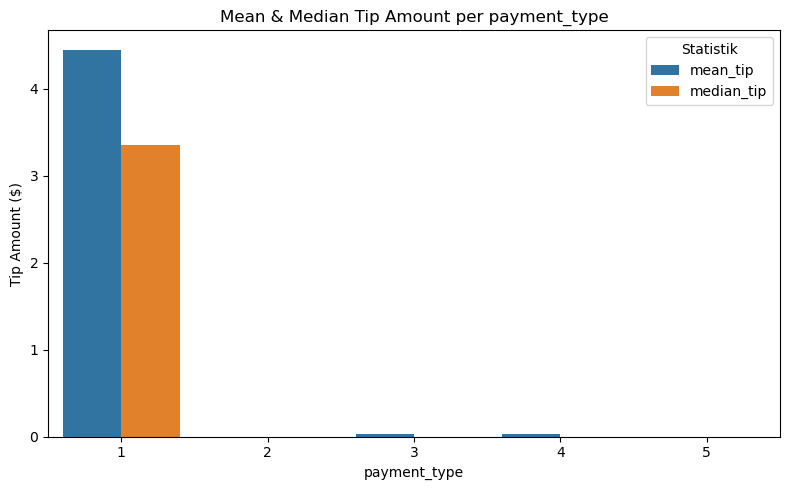

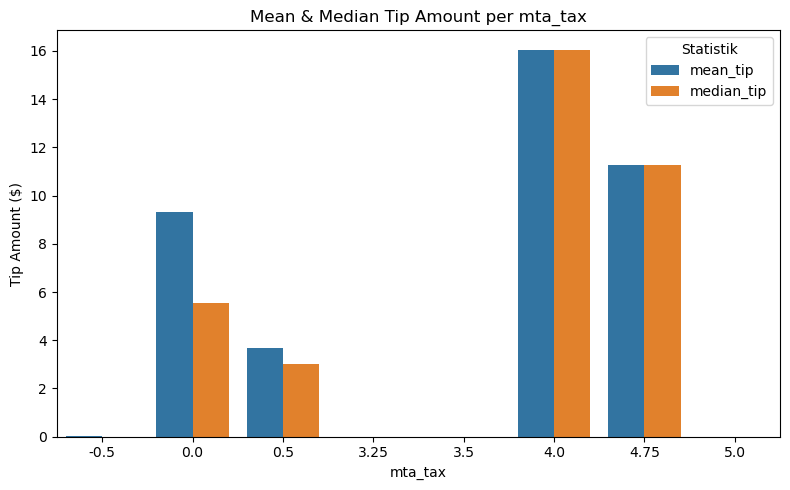

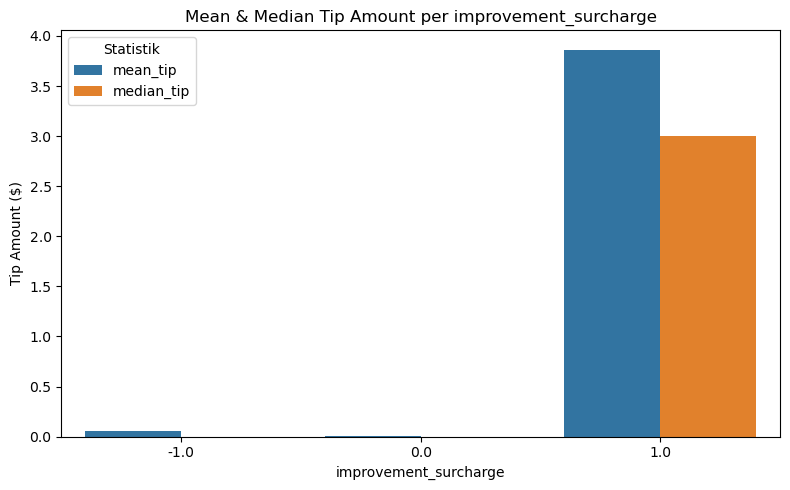

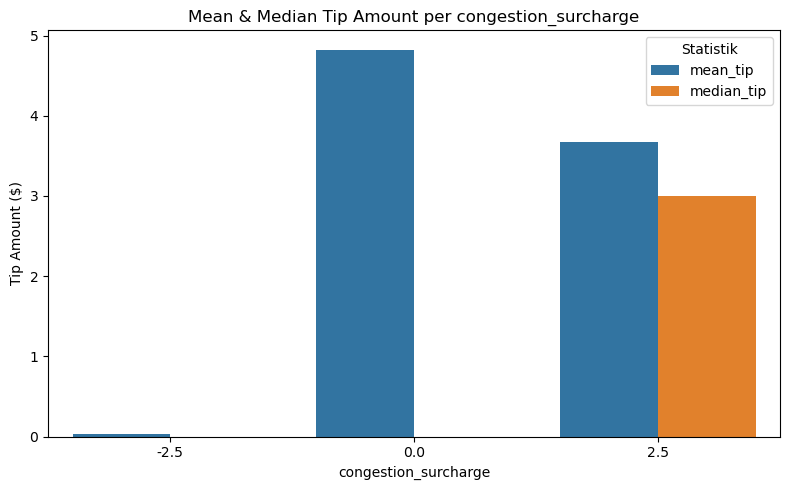

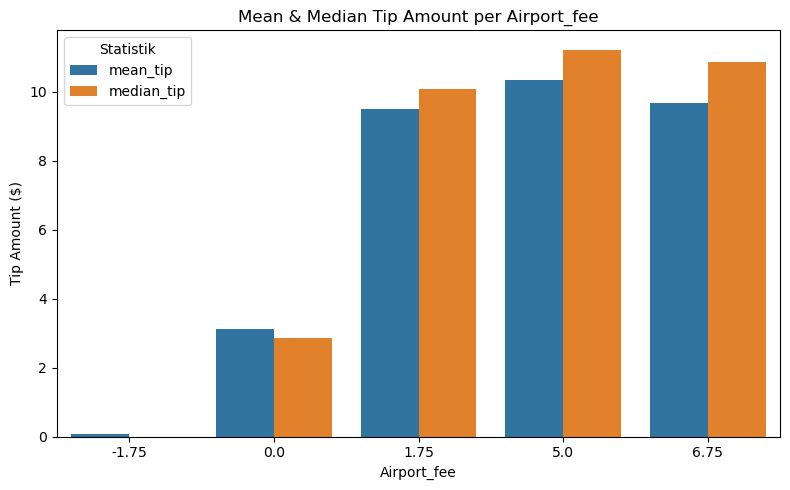

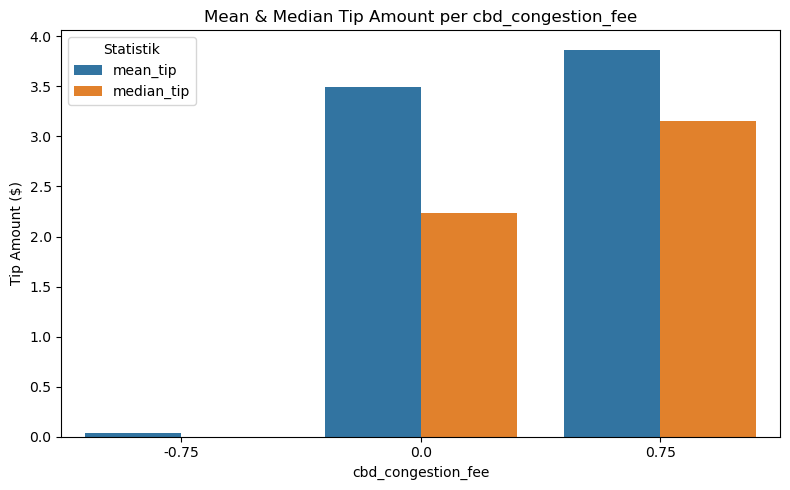

In [25]:
# korelasi antara kolom kategori dan tip_amount

for kategori in cat_col:
    # Hitung mean dan median tip_amount untuk tiap kategori
    mean_tip = positive_amount_data.groupby(kategori)['tip_amount'].mean().reset_index(name='mean_tip')
    median_tip = positive_amount_data.groupby(kategori)['tip_amount'].median().reset_index(name='median_tip')
    summary = mean_tip.merge(median_tip, on=kategori)
    # Ubah ke long format agar bisa pakai hue
    summary_long = summary.melt(id_vars=kategori, value_vars=['mean_tip', 'median_tip'],
                                var_name='Statistik', value_name='Tip Amount')
    plt.figure(figsize=(8,5))
    sns.barplot(data=summary_long, x=kategori, y='Tip Amount', hue='Statistik')
    plt.title(f'Mean & Median Tip Amount per {kategori}')
    plt.ylabel('Tip Amount ($)')
    plt.xlabel(kategori)
    plt.tight_layout()
    plt.show()

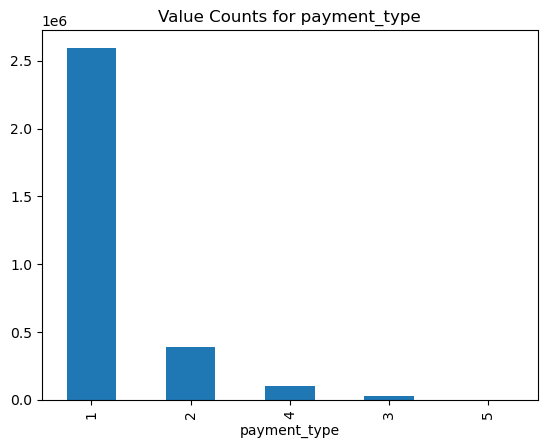

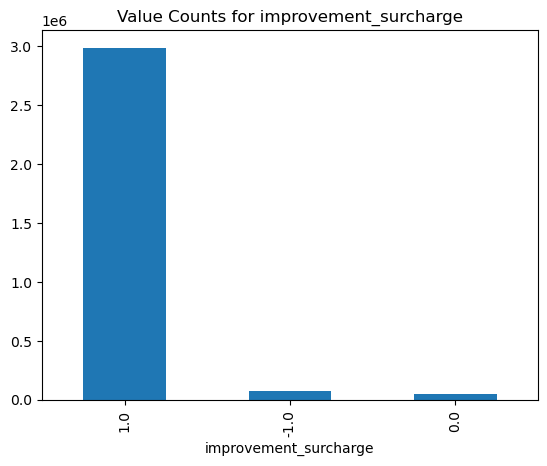

In [26]:
# atteantion column 
attention_col = ['payment_type', 'improvement_surcharge']
for col in attention_col:
    positive_amount_data[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.show()